In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import calendar
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import RandomOverSampler
data_set=pd.read_csv(r"C:\Users\donku\Downloads\Hotel_Booking_Mgmt\fact_bookings.csv")
property_set=pd.read_csv(r"C:\Users\donku\Downloads\Hotel_Booking_Mgmt\dim_hotels.csv")

In [2]:
data_set.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [3]:
#data_set[data_set.duplicated()].shape
data_set=data_set.drop_duplicates()
data_set.shape

(134590, 12)

In [4]:
data_set=data_set.assign(no_days_book_to_checkin=None,no_days_checkin_checkout=None,no_holiday=None,city=None,hotel_type=None,revenue_person=None)

In [5]:
#Removal Of Unwanted Data
data_set=data_set.drop(columns=['booking_id','ratings_given','revenue_realized'])
city,hotel_type,rev_person=[],[],[]
for c in range(len(data_set)):
    data_set.loc[c,'revenue_person']=int(data_set['revenue_generated'][c])/int(data_set['no_guests'][c])
    for j in range(len(property_set)):
        if (property_set['property_id'][j]==data_set['property_id'][c]):
            city.append(property_set['city'][j])
            if(property_set['category'][j]=="Luxury"):
                hotel_type.append(int(1))
            else:
                hotel_type.append(int(0))
            break
data_set["city"]=city
data_set["hotel_type"]=hotel_type

In [6]:
#Finding the number of days from booking_date and check_in_date
def no_of_days_between(from_date,to_date,hol):
    booking_checkin=[]
    for c in range (len(data_set)):
        holiday=0
        f_date=datetime.datetime.strptime(data_set[from_date][c], '%Y-%m-%d').date()
        t_date=datetime.datetime.strptime(data_set[to_date][c], '%Y-%m-%d').date()
        no_days=t_date-f_date
        booking_checkin.append(no_days.days)
        delta=datetime.timedelta(days=1)
        if hol==True:
            while (f_date<=t_date):
                f_date+=delta
                if(f_date.weekday()>=5):
                    holiday+=1
            no_hol.append(holiday)
    return(booking_checkin)

In [7]:
no_hol=[]
data_set["no_days_book_to_checkin"]=no_of_days_between('booking_date','check_in_date',hol=False)
data_set["no_days_checkin_checkout"]=no_of_days_between('check_in_date','checkout_date',hol=True)
data_set["no_holiday"]=no_hol

In [8]:
data_set.tail()

,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,booking_status,revenue_generated,no_days_book_to_checkin,no_days_checkin_checkout,no_holiday,city,hotel_type,revenue_person
134585,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,Checked Out,32300,2,3,0,Mumbai,0,32300.0
134586,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,Checked Out,38760,1,1,0,Mumbai,0,9690.0
134587,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,Cancelled,32300,1,2,0,Mumbai,0,32300.0
134588,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,Checked Out,32300,2,1,0,Mumbai,0,16150.0
134589,17564,2022-07-31,2022-07-31,2022-08-01,2,RT4,makeyourtrip,Cancelled,32300,0,1,0,Mumbai,0,16150.0


In [9]:
data_set["no_holiday"].unique()

array([0, 1, 2], dtype=int64)

In [10]:
data_set.info()
data_set["booking_status"]=np.where(data_set["booking_status"]=="Cancelled",0,data_set["booking_status"])
data_set["booking_status"]=np.where(data_set["booking_status"]=="Checked Out", 1, data_set["booking_status"])
data_set["booking_status"]=np.where(data_set["booking_status"]=="No Show", 1, data_set["booking_status"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   property_id               134590 non-null  int64 
 1   booking_date              134590 non-null  object
 2   check_in_date             134590 non-null  object
 3   checkout_date             134590 non-null  object
 4   no_guests                 134590 non-null  int64 
 5   room_category             134590 non-null  object
 6   booking_platform          134590 non-null  object
 7   booking_status            134590 non-null  object
 8   revenue_generated         134590 non-null  int64 
 9   no_days_book_to_checkin   134590 non-null  int64 
 10  no_days_checkin_checkout  134590 non-null  int64 
 11  no_holiday                134590 non-null  int64 
 12  city                      134590 non-null  object
 13  hotel_type                134590 non-null  int64 
 14  reve

In [11]:
data_set["room_category"]=np.where(data_set["room_category"]=="RT1", 1,data_set["room_category"])
data_set["room_category"]=np.where(data_set["room_category"]=="RT2", 2,data_set["room_category"])
data_set["room_category"]=np.where(data_set["room_category"]=="RT3", 3,data_set["room_category"])
data_set["room_category"]=np.where(data_set["room_category"]=="RT4", 4,data_set["room_category"])

In [12]:
data_set["city"]=np.where(data_set["city"]=="Delhi", 1,data_set["city"])
data_set["city"]=np.where(data_set["city"]=="Mumbai", 2,data_set["city"])
data_set["city"]=np.where(data_set["city"]=="Hyderabad", 3,data_set["city"])
data_set["city"]=np.where(data_set["city"]=="Bangalore", 4,data_set["city"])

In [13]:
data_set["booking_platform"]=np.where(data_set["booking_platform"]=="direct online", 1,data_set["booking_platform"])
data_set["booking_platform"]=np.where(data_set["booking_platform"]=="others", 2,data_set["booking_platform"])
data_set["booking_platform"]=np.where(data_set["booking_platform"]=="logtrip", 3,data_set["booking_platform"])
data_set["booking_platform"]=np.where(data_set["booking_platform"]=="tripster", 4,data_set["booking_platform"])
data_set["booking_platform"]=np.where(data_set["booking_platform"]=="makeyourtrip", 5,data_set["booking_platform"])
data_set["booking_platform"]=np.where(data_set["booking_platform"]=="journey", 6,data_set["booking_platform"])
data_set["booking_platform"]=np.where(data_set["booking_platform"]=="direct offline", 7,data_set["booking_platform"])

In [14]:
#Removal of Data which is done after feature generation
data_set=data_set.drop(columns=['booking_date','check_in_date','checkout_date'])
data_set.info()
data_set[["booking_status","room_category","booking_platform"]]=data_set[["booking_status","room_category","booking_platform"]].astype(int).astype(int).astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   property_id               134590 non-null  int64 
 1   no_guests                 134590 non-null  int64 
 2   room_category             134590 non-null  object
 3   booking_platform          134590 non-null  object
 4   booking_status            134590 non-null  object
 5   revenue_generated         134590 non-null  int64 
 6   no_days_book_to_checkin   134590 non-null  int64 
 7   no_days_checkin_checkout  134590 non-null  int64 
 8   no_holiday                134590 non-null  int64 
 9   city                      134590 non-null  object
 10  hotel_type                134590 non-null  int64 
 11  revenue_person            134590 non-null  object
dtypes: int64(7), object(5)
memory usage: 12.3+ MB


In [15]:
data_set=data_set.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,4]]

In [29]:
#data_set=data_set[data_set['property_id']==16559]
data_set.tail()

,property_id,no_guests,room_category,booking_platform,revenue_generated,no_days_book_to_checkin,no_days_checkin_checkout,no_holiday,city,hotel_type,revenue_person,booking_status
134585,17564,1.0,4,5,30150,2.0,3,0,2,0,20312.5,1
134586,17564,3.5,4,3,30150,1.0,1,0,2,0,9690.0,1
134587,17564,1.0,4,4,30150,1.0,2,0,2,0,20312.5,0
134588,17564,2.0,4,3,30150,2.0,1,0,2,0,16150.0,1
134589,17564,2.0,4,5,30150,0.0,1,0,2,0,16150.0,0


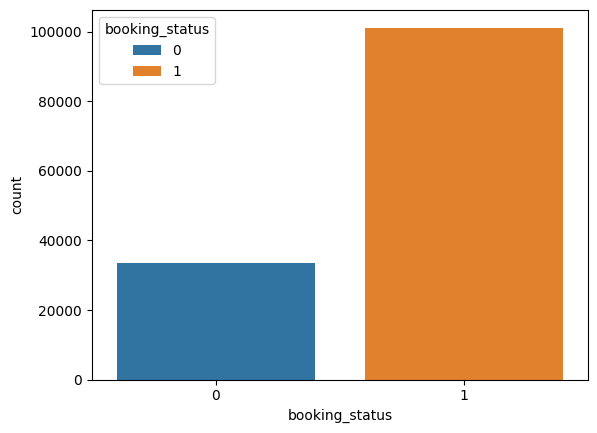

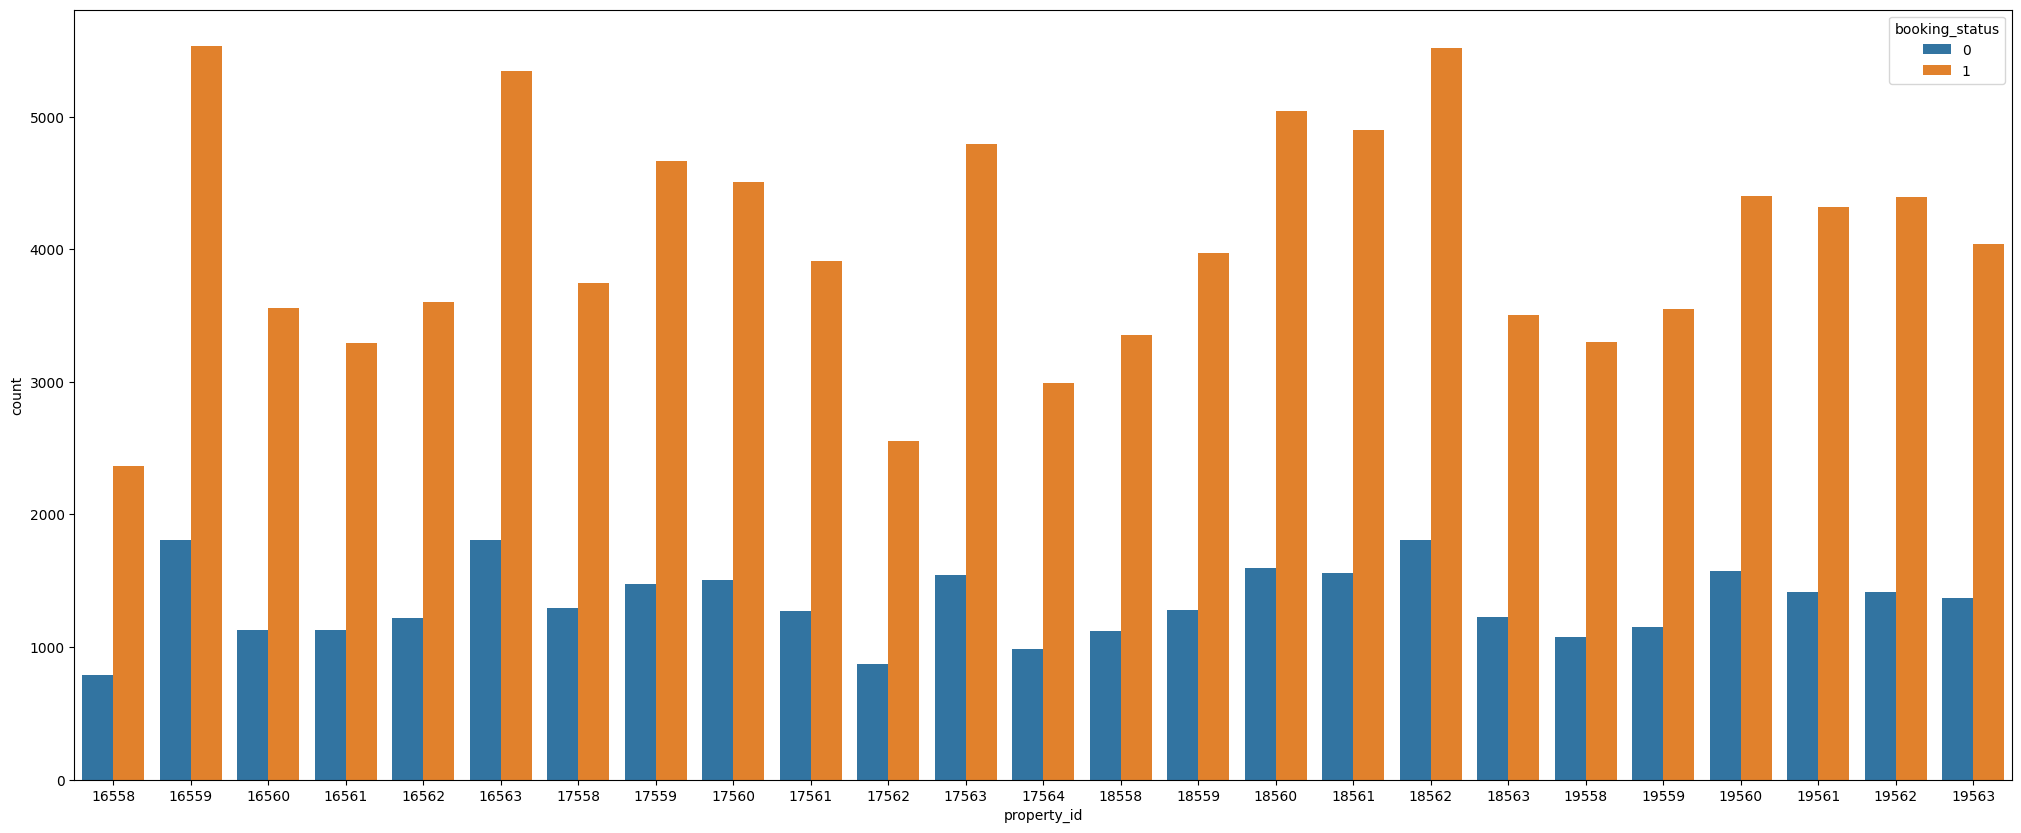

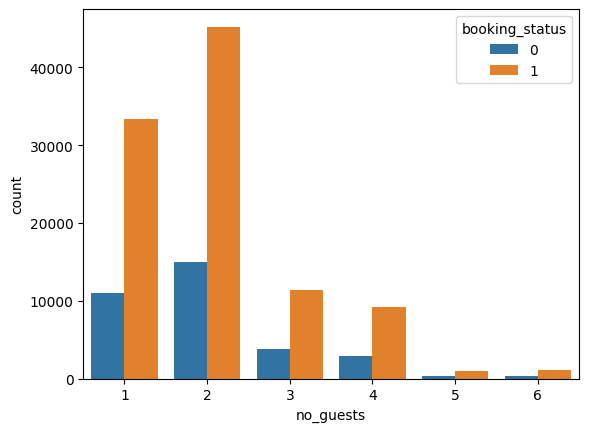

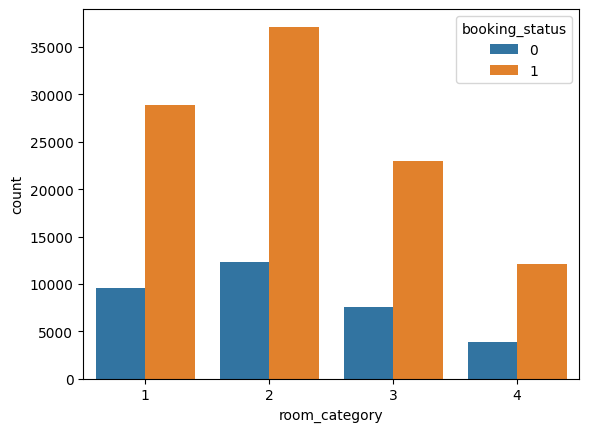

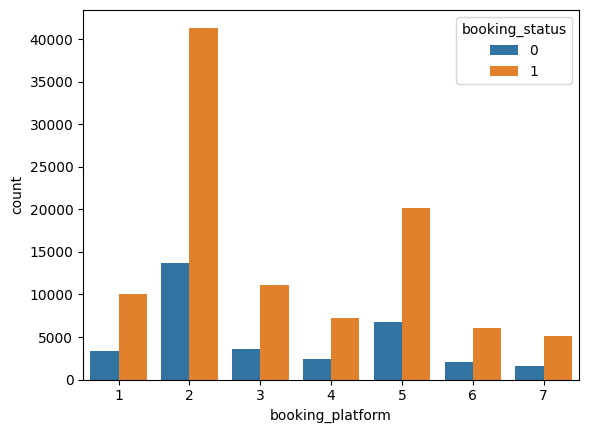

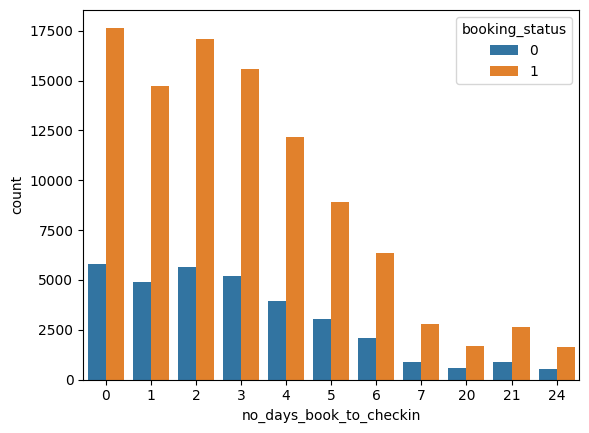

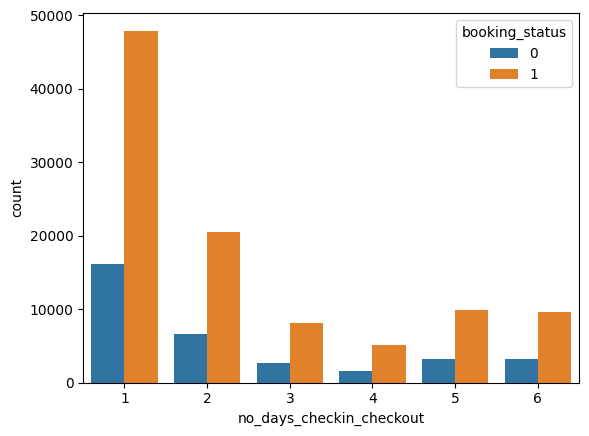

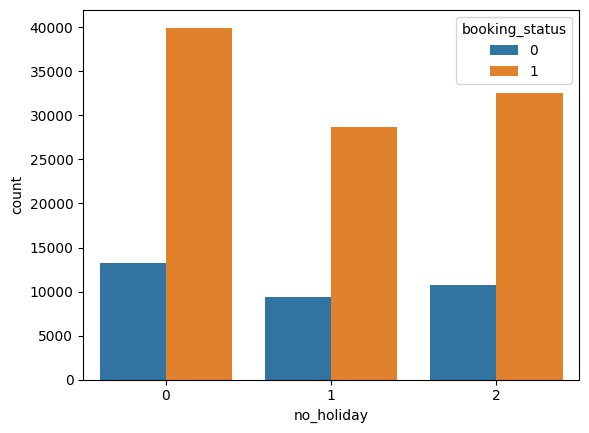

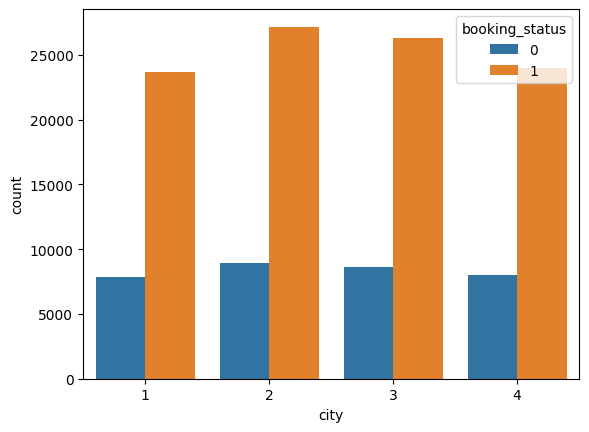

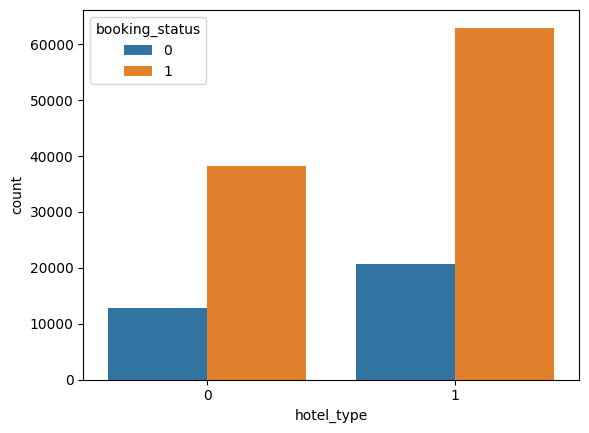

In [17]:
sns.countplot(data_set,x='booking_status',hue='booking_status')
plt.show()
plt.figure(figsize=(25,10))
sns.countplot(data_set,x='property_id',hue='booking_status')
plt.show()
sns.countplot(data_set,x='no_guests',hue='booking_status')
plt.show()
sns.countplot(data_set,x='room_category',hue='booking_status')
plt.show()
sns.countplot(data_set,x='booking_platform',hue='booking_status')
plt.show()
sns.countplot(data_set,x='no_days_book_to_checkin',hue='booking_status')
plt.show()
sns.countplot(data_set,x='no_days_checkin_checkout',hue='booking_status')
plt.show()
sns.countplot(data_set,x='no_holiday',hue='booking_status')
plt.show()
sns.countplot(data_set,x='city',hue='booking_status')
plt.show()
sns.countplot(data_set,x='hotel_type',hue='booking_status')
plt.show()

<Axes: xlabel='booking_status', ylabel='revenue_generated'>

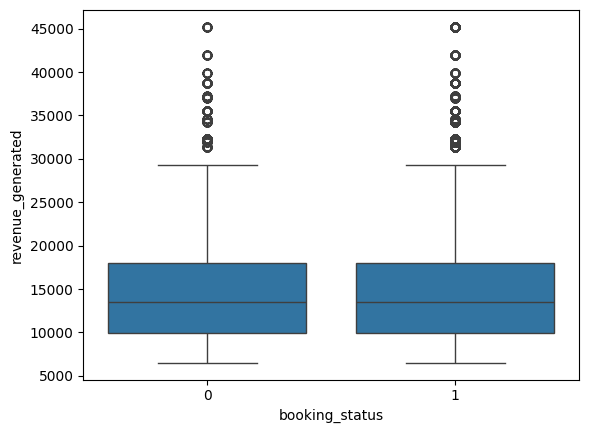

In [18]:
sns.boxplot(y='revenue_generated',x='booking_status',data=data_set)

<Axes: xlabel='booking_status', ylabel='revenue_person'>

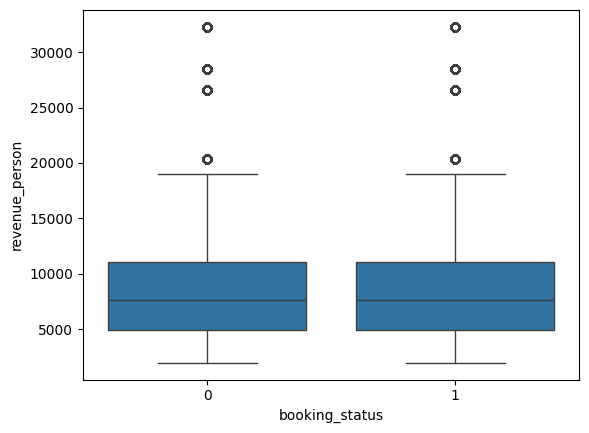

In [19]:
sns.boxplot(y='revenue_person',x='booking_status',data=data_set)

<Axes: xlabel='booking_status', ylabel='no_days_book_to_checkin'>

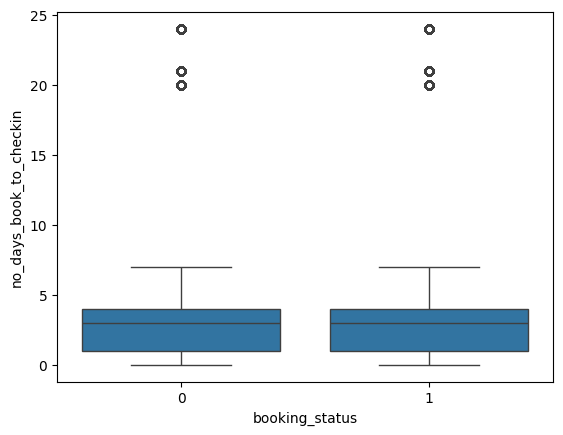

In [20]:
sns.boxplot(y='no_days_book_to_checkin',x='booking_status',data=data_set)

<Axes: xlabel='booking_status', ylabel='no_guests'>

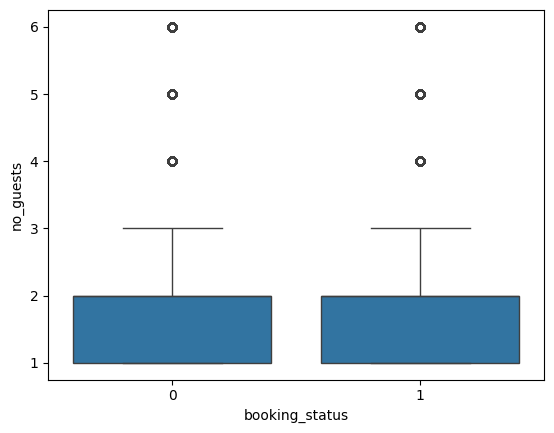

In [21]:
sns.boxplot(y='no_guests',x='booking_status',data=data_set)

In [22]:
def iqr_method(outlier):
    #Removing Outliers using IQR Method
    q1=data_set[outlier].quantile(0.25)
    q3=data_set[outlier].quantile(0.75)
    iqr=q3-q1
    upper_limit = q3 + (1.5*iqr)
    lower_limit = q1 - (1.5*iqr)
    #capping
    data_set.loc[(data_set[outlier]>upper_limit),outlier]=upper_limit
    data_set.loc[(data_set[outlier]<lower_limit),outlier]=lower_limit

In [23]:
iqr_method('no_guests')
iqr_method('revenue_person')
iqr_method('revenue_generated')
iqr_method('no_days_book_to_checkin')

C:\Users\donku\AppData\Local\Temp\ipykernel_17732\1941874273.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_set.loc[(data_set[outlier]>upper_limit),outlier]=upper_limit
C:\Users\donku\AppData\Local\Temp\ipykernel_17732\1941874273.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_set.loc[(data_set[outlier]>upper_limit),outlier]=upper_limit


<Axes: xlabel='booking_status', ylabel='revenue_generated'>

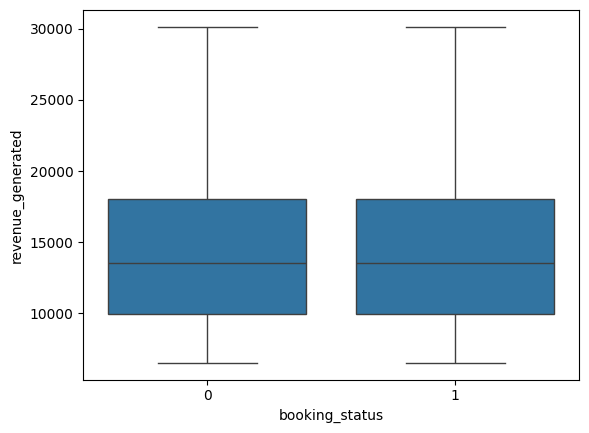

In [24]:
sns.boxplot(y='revenue_generated',x='booking_status',data=data_set)

<Axes: xlabel='booking_status', ylabel='revenue_person'>

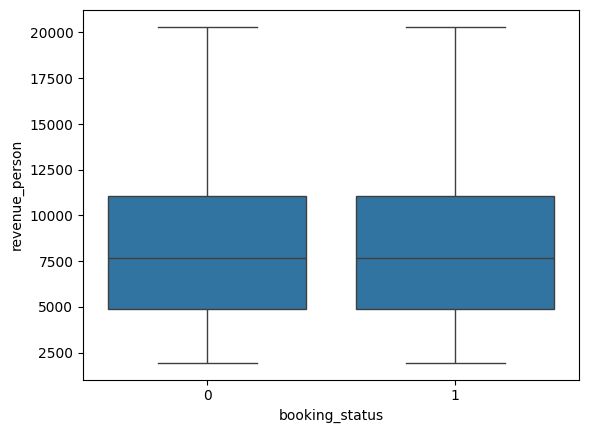

In [25]:
sns.boxplot(y='revenue_person',x='booking_status',data=data_set)

<Axes: xlabel='booking_status', ylabel='no_days_book_to_checkin'>

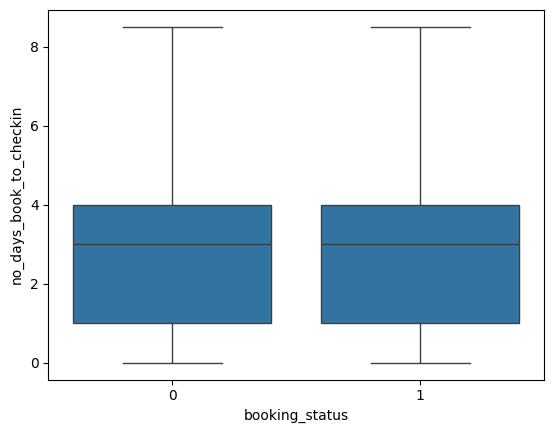

In [26]:
sns.boxplot(y='no_days_book_to_checkin',x='booking_status',data=data_set)

<Axes: xlabel='booking_status', ylabel='no_guests'>

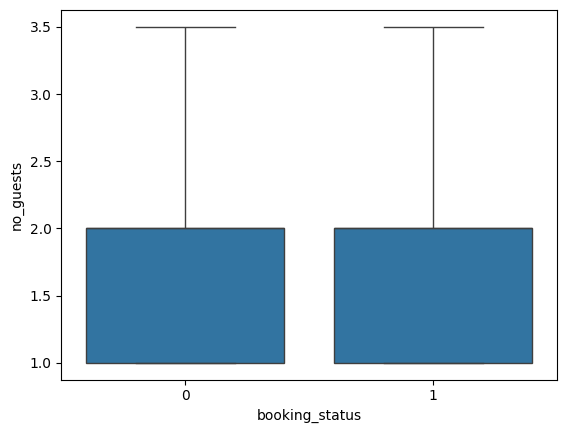

In [27]:
sns.boxplot(y='no_guests',x='booking_status',data=data_set)

<Axes: >

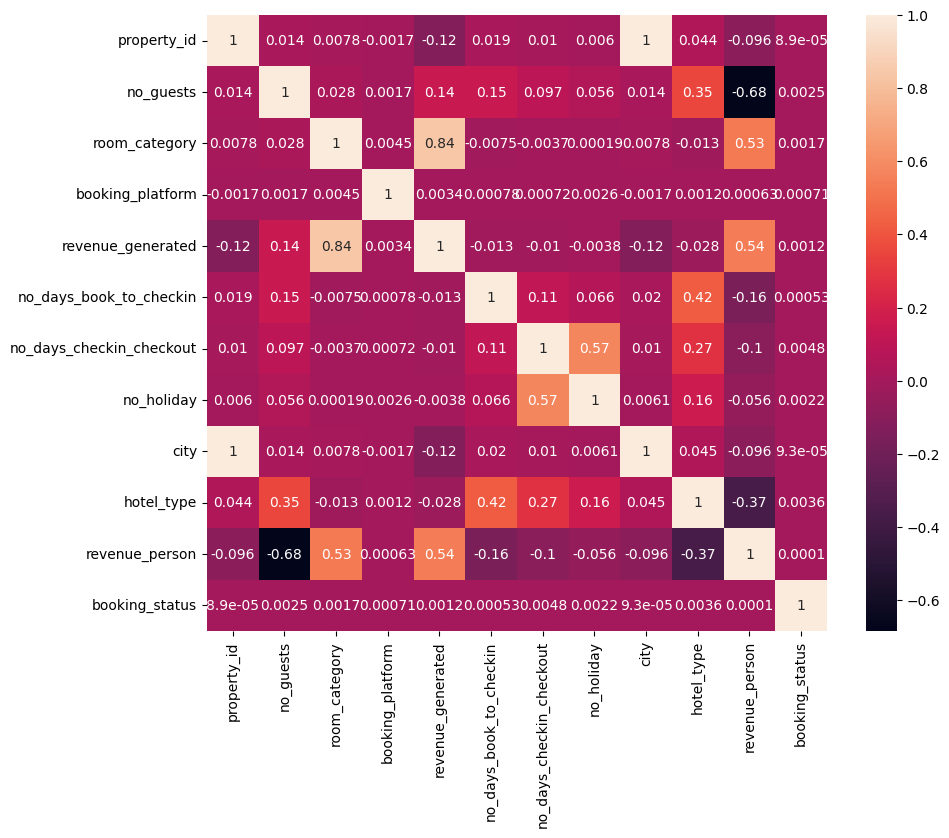

In [28]:
corelation = data_set.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)